# Final Project
## Joshua Grou and Raja Agireddy

In [3]:
import torch
import torchvision
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import numpy as np

In [4]:
#img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=0)

#images, labels = next(img_gen.flow_from_directory('./Data/train'))

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [6]:
transform= torchvision.transforms.Compose([torchvision.transforms.Resize((100,100)),ToTensor()])

training_data = torchvision.datasets.ImageFolder('./Data/train', transform = transform)
testing_data = torchvision.datasets.ImageFolder('./Data/test', transform = transform)
validation_data = torchvision.datasets.ImageFolder('./Data/valid', transform = transform)

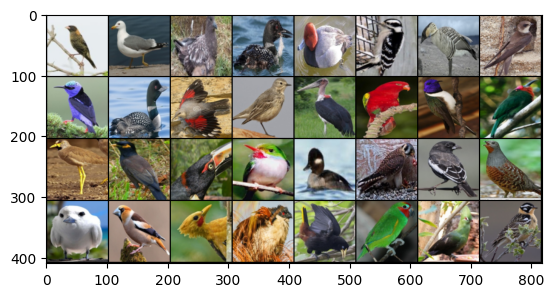

BOBOLINK CALIFORNIA GULL SKUA  COMMON LOON RED HEADED DUCK DOWNY WOODPECKER HAWAIIAN GOOSE SAND MARTIN RED HONEY CREEPER COMMON LOON WALL CREAPER AMERICAN PIPIT MARABOU STORK CHATTERING LORY ECUADORIAN HILLSTAR RED BEARDED BEE EATER WATTLED LAPWING MYNA  COLLARED ARACARI CUBAN TODY BUFFLEHEAD AMERICAN KESTREL LARK BUNTING SWINHOES PHEASANT FAIRY TERN HAWFINCH CREAM COLORED WOODPECKER COPPERY TAILED COUCAL CRESTED OROPENDOLA DOUBLE EYED FIG PARROT GUINEA TURACO SMITHS LONGSPUR


In [11]:
batch_size = 32
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True, num_workers = 4)
test_dataloader = DataLoader(testing_data, batch_size=batch_size, shuffle=True, num_workers = 4)
def imshow(img):
    img = img
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_dataloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
classes = training_data.classes
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [8]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(7744, 4000)
        self.fc2 = nn.Linear(4000,1000)
        self.fc3 = nn.Linear(1000, 450)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [12]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

net = net.to(device)
print(device)
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

cuda:0
cuda:0
[1,  2000] loss: 5.680
[2,  2000] loss: 5.312
[3,  2000] loss: 4.769
[4,  2000] loss: 4.258
[5,  2000] loss: 3.726
[6,  2000] loss: 3.241
[7,  2000] loss: 2.789
[8,  2000] loss: 2.341
[9,  2000] loss: 1.915
[10,  2000] loss: 1.464
Finished Training


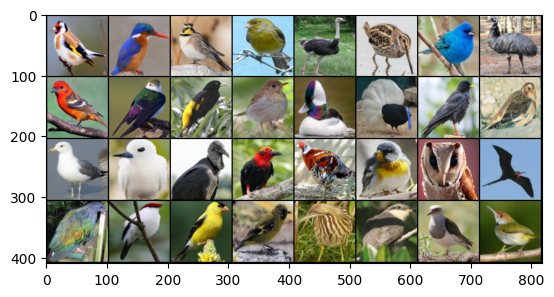

GroundTruth:  EUROPEAN GOLDFINCH MALACHITE KINGFISHER HORNED LARK CANARY


In [14]:
dataiter = iter(test_dataloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [19]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 45 %


In [20]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: ABBOTTS BABBLER is 0.0 %
Accuracy for class: ABBOTTS BOOBY is 0.0 %
Accuracy for class: ABYSSINIAN GROUND HORNBILL is 40.0 %
Accuracy for class: AFRICAN CROWNED CRANE is 20.0 %
Accuracy for class: AFRICAN EMERALD CUCKOO is 60.0 %
Accuracy for class: AFRICAN FIREFINCH is 20.0 %
Accuracy for class: AFRICAN OYSTER CATCHER is 0.0 %
Accuracy for class: AFRICAN PIED HORNBILL is 0.0 %
Accuracy for class: ALBATROSS is 20.0 %
Accuracy for class: ALBERTS TOWHEE is 80.0 %
Accuracy for class: ALEXANDRINE PARAKEET is 20.0 %
Accuracy for class: ALPINE CHOUGH is 20.0 %
Accuracy for class: ALTAMIRA YELLOWTHROAT is 0.0 %
Accuracy for class: AMERICAN AVOCET is 60.0 %
Accuracy for class: AMERICAN BITTERN is 20.0 %
Accuracy for class: AMERICAN COOT is 60.0 %
Accuracy for class: AMERICAN FLAMINGO is 60.0 %
Accuracy for class: AMERICAN GOLDFINCH is 40.0 %
Accuracy for class: AMERICAN KESTREL is 0.0 %
Accuracy for class: AMERICAN PIPIT is 40.0 %
Accuracy for class: AMERICAN REDSTART is 40